<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/15.HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hidden Markov Model

A [Markov chain](https://en.wikipedia.org/wiki/Markov_chain) or process is a stochastic model for describing a sequence of events where the probability of an event depends only on the previous event. [Hidden Markov model](https://en.wikipedia.org/wiki/Hidden_Markov_model) is a special case of Markov process with unobservable ("hidden") states.

To understand how Hidden Markov Model works, watch [A friendly introduction to Bayes Theorem and Hidden Markov Models](https://www.youtube.com/watch?v=kqSzLo9fenk&t=1746s) and also read the following exerpt on Viterbi algorithm.


## Fever example
[wiki:Viterbi algorithm example](https://en.wikipedia.org/wiki/Viterbi_algorithm#Example)

> Consider a village where all villagers are either healthy or have a fever and only the village doctor can determine whether each has a fever. The doctor diagnoses fever by asking patients how they feel. The villagers may only answer that they feel normal, dizzy, or cold.

>  The doctor believes that the health condition of his patients operates as a discrete Markov chain. There are two states, "Healthy" and "Fever", but the doctor cannot observe them directly; they are hidden from him. On each day, there is a certain chance that the patient will tell the doctor he is "normal", "cold", or "dizzy", depending on his health condition.

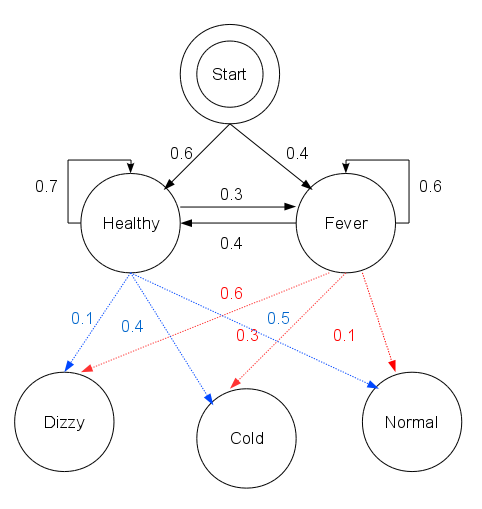

### Hidden States and Observable Variables
- Hidden states: Healthy and Fever
- Observable variables: Dizzy, Cold, Normal

### Probabilities
- **Initial probabilities:**
"Healthy" and "Fever" are two hidden states and they have initial prior probabilities of 0.6 and 0.4 respectively.
- **Transition probabilities:**
The Healthy state has two black outgoing arrows to other hidden states: one has the probability of 0.7 pointing to itself and the other to Fever with 0.3 probability. These are called transition probabilities meaning that they refer to the probabilities for hidden state transitions.
- **Emission probabilities:**
The Healthy state also has three blue arrow going out to three observable states with different probabilities. They are called, "emission probabilities."


## Examples

### Question 1
What is the probability of Healthy and Normal? In other words, what is the probability of a person being healthy and having normal temperature?

Assuming H = Healthy, N = Normal
$ P(H, N) = P(N|H)P(H) $ (Product Rule)
 = 0.6 x 0.5

### Question 2
Calculate Maximum Likelihood Estimates for hidden states
Now consider a simple case of guessing the hidden state if the observable state is Normal. 


what are the health states for Normal, Cold, Dizzy observable states (symptoms)?

### Method1: Calculate by hand

| # | Day1 | Day2 | Day3 |
|--- | --- | --- | --- |
| 1 | Healthy | Healthy | Healthy |
| 2 | Healthy | Healthy | Fever |
| 3 | Healthy | Fever | Healthy |
| 4 | Healthy | Fever | Fever |
| 5 | Fever | Healthy | Healthy |
| 6 | Fever | Healthy | Fever |
| 7 | Fever | Fever | Healthy |
| 8 | Fever | Fever | Fever |



For #1, the probability for Healthy-Healthy given in Normal-Cold observables is:
- 0.6: initial prior probability (Healthy)
- 0.7: transition probability (Healthy->Healthy)
- 0.5: emission probability (Healthy->Normal)
- 0.4: emission probability (Healthy->Cold)

In [ ]:
# def calc_hidden_state_probs()

def calc_hidden_state_probs(hidden_states,
                            observables=["normal", "cold", "dizzy"],
                            init_probs=start_p,
                            trans_probs=trans_p,
                            emit_probs=emit_p):
  state_prev = hidden_states[0]
  obs_prev = observables[0]

  c_emit_prev = emit_probs[state_prev][obs_prev]
  joint_prob = init_probs[state_prev] * c_emit_prev

  for c_state, c_obs in zip(hidden_states[1:], observables[1:]):
    c_trans_p = trans_probs[state_prev][c_state]
    c_emit_cur = emit_probs[c_state][c_obs]

    joint_prob = joint_prob * c_trans_p * c_emit_cur

    state_prev = c_state
    obs_prev = c_obs

  print("Probability {} is {:.3f}".format(hidden_states, joint_prob))
  return joint_prob

If we calculate all the joint probabilities, we can see that ["Healthy", "Healthy", "Fever"] has the highest probability with 0.015 which is the same answer as the Viterbi algorithm.

In [ ]:
calc_hidden_state_probs(["Healthy", "Healthy", "Healthy"])
calc_hidden_state_probs(["Healthy", "Healthy", "Fever"])
calc_hidden_state_probs(["Healthy", "Fever", "Healthy"])
calc_hidden_state_probs(["Healthy", "Fever", "Fever"])
calc_hidden_state_probs(["Fever", "Healthy", "Healthy"])
calc_hidden_state_probs(["Fever", "Healthy", "Fever"])
calc_hidden_state_probs(["Fever", "Fever", "Healthy"])
calc_hidden_state_probs(["Fever", "Fever", "Fever"])

Probability ['Healthy', 'Healthy', 'Healthy'] is 0.006
Probability ['Healthy', 'Healthy', 'Fever'] is 0.015
Probability ['Healthy', 'Fever', 'Healthy'] is 0.001
Probability ['Healthy', 'Fever', 'Fever'] is 0.010
Probability ['Fever', 'Healthy', 'Healthy'] is 0.000
Probability ['Fever', 'Healthy', 'Fever'] is 0.001
Probability ['Fever', 'Fever', 'Healthy'] is 0.000
Probability ['Fever', 'Fever', 'Fever'] is 0.003


0.002592

In [ ]:
0.6 * 0.5 * 0.7 * 0.4 * 0.7 * 0.1

0.00588

In [ ]:
mood_obs = ["happy", "grumpy", "happy"]
weather_states = ["Sunny", "Rainy"]
weather_start_p = {"Sunny": 2/3, "Rainy": 1/3}
weather_trans_p = {
    "Sunny": {"Sunny": 0.8, "Rainy": 0.2},
    "Rainy": {"Sunny": 0.4, "Rainy": 0.6},
}
weather_emit_p = {
    "Sunny": {"happy": 0.8, "grumpy": 0.2},
    "Rainy": {"happy": 0.4, "grumpy": 0.6},
}

state_trans = [(s1, s2, s3) for s1 in weather_states for s2 in weather_states for s3 in weather_states]

print(state_trans)

for s1, s2, s3 in state_trans:
  calc_hidden_state_probs([s1, s2, s3],
                          observables=mood_obs,
                          init_probs=weather_start_p,
                          trans_probs=weather_trans_p,
                          emit_probs=weather_emit_p)

[('Sunny', 'Sunny', 'Sunny'), ('Sunny', 'Sunny', 'Rainy'), ('Sunny', 'Rainy', 'Sunny'), ('Sunny', 'Rainy', 'Rainy'), ('Rainy', 'Sunny', 'Sunny'), ('Rainy', 'Sunny', 'Rainy'), ('Rainy', 'Rainy', 'Sunny'), ('Rainy', 'Rainy', 'Rainy')]
Probability ['Sunny', 'Sunny', 'Sunny'] is 0.055
Probability ['Sunny', 'Sunny', 'Rainy'] is 0.007
Probability ['Sunny', 'Rainy', 'Sunny'] is 0.020
Probability ['Sunny', 'Rainy', 'Rainy'] is 0.015
Probability ['Rainy', 'Sunny', 'Sunny'] is 0.007
Probability ['Rainy', 'Sunny', 'Rainy'] is 0.001
Probability ['Rainy', 'Rainy', 'Sunny'] is 0.015
Probability ['Rainy', 'Rainy', 'Rainy'] is 0.012


In [ ]:
mood_obs = ["happy", "happy", "grumpy", "grumpy", "grumpy", "happy"]
state_trans = [(s1, s2, s3, s4, s5, s6) for s1 in weather_states \
               for s2 in weather_states for s3 in weather_states \
               for s4 in weather_states for s5 in weather_states \
               for s6 in weather_states]

print(state_trans)

for s1, s2, s3, s4, s5, s6 in state_trans:
  calc_hidden_state_probs([s1, s2, s3, s4, s5, s6],
                          observables=mood_obs,
                          init_probs=weather_start_p,
                          trans_probs=weather_trans_p,
                          emit_probs=weather_emit_p)

[('Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny'), ('Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy'), ('Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Sunny'), ('Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy'), ('Sunny', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny'), ('Sunny', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Rainy'), ('Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny'), ('Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Rainy'), ('Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Sunny'), ('Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy'), ('Sunny', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny'), ('Sunny', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Rainy'), ('Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Sunny'), ('Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'), ('Sunny', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Sunny'), ('Sunny', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy'), ('Sunny', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny'), ('Sunny', 'Rainy', 'Sunny', 'Sunny', 'Sunny', '

In [ ]:
viterbi(mood_obs,
        weather_states,
        weather_start_p,
        weather_trans_p,
        weather_emit_p)

[{'Sunny': {'prob': 0.5333333333333333, 'prev': None}}]
[{'Sunny': {'prob': 0.5333333333333333, 'prev': None}, 'Rainy': {'prob': 0.13333333333333333, 'prev': None}}]
       0       1       2       3       4       5
Sunny: 0.53333 0.34133 0.05461 0.00873 0.00139 0.00169
Rainy: 0.13333 0.04266 0.04096 0.01474 0.00530 0.00127
The steps of states are Sunny Sunny Rainy Rainy Rainy Sunny with highest probability of 0.00169869312


## Implementation of Viterbi algorithm

In [ ]:
obs = ("normal", "cold", "dizzy")
states = ("Healthy", "Fever")
start_p = {"Healthy": 0.6, "Fever": 0.4}
trans_p = {
    "Healthy": {"Healthy": 0.7, "Fever": 0.3},
    "Fever": {"Healthy": 0.4, "Fever": 0.6},
}
emit_p = {
    "Healthy": {"normal": 0.5, "cold": 0.4, "dizzy": 0.1},
    "Fever": {"normal": 0.1, "cold": 0.3, "dizzy": 0.6},
}

def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
        print(V)

    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t - 1][states[0]]["prob"] * trans_p[states[0]][st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t - 1][prev_st]["prob"] * trans_p[prev_st][st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st

            max_prob = max_tr_prob * emit_p[st][obs[t]]
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}

    for line in dptable(V):
        print(line)

    opt = []
    max_prob = 0.0
    best_st = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st

    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]

    print ("The steps of states are " + " ".join(opt) + " with highest probability of %s" % max_prob)

def dptable(V):
    # Print a table of steps from dictionary
    yield " " * 5 + "     ".join(("%3d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%lf" % v[state]["prob"]) for v in V)

In [ ]:
viterbi(obs,
        states,
        start_p,
        trans_p,
        emit_p)

[{'Healthy': {'prob': 0.3, 'prev': None}}]
[{'Healthy': {'prob': 0.3, 'prev': None}, 'Fever': {'prob': 0.04000000000000001, 'prev': None}}]
       0       1       2
Healthy: 0.30000 0.08400 0.00588
Fever: 0.04000 0.02700 0.01512
The steps of states are Healthy Healthy Fever with highest probability of 0.01512
